# Importar datos del servidor Nasa Giovanni

In [1]:
direcciones = open('Txt/prov.postprocess+sMpAn+dGPM_3IMERGHH_03_precipitationCal+zNA+t20151101000000_20151104235959+b79.8500W_4.8500S_66.9700W_13.1000N.txt','r').readlines()
direcciones[0][-33:-1]

'20151101000000.79W_4S_66W_13N.nc'

In [2]:
import urllib.request, os

for direccion in direcciones:
    u = urllib.request.urlretrieve(direccion)[:-1]
    print (u[0])
    print (direccion[-33:-1])
    os.rename(u[0], 'NetCDF/' + direccion[-33:-1])

/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpdkdko_a4
20151101000000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpmh_q08bs
20151101003000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmptg6cu952
20151101010000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpemrm515m
20151101013000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpulavap0s
20151101020000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmphtc67ztf
20151101023000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpz716yl2o
20151101030000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpy840fn6h
20151101033000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpodnk02u3
20151101040000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmpzd0exeqz
20151101043000.79W_4S_66W_13N.nc
/var/folders/z7/zw4926wx5qj2qqrh06t7nnbc0000gn/T/tmp0r3jnpaj

KeyboardInterrupt: 

<hr />

# Llama  a los archivos y los pone en una lista

Analizando lugar de trabajo

In [3]:
%pwd

'/Users/saulmontoya/MEGAsync/GitHub/16_Interactive_Precipitation_Plot_Colombia'

In [4]:
from glob import glob
archivos = sorted(glob('NetCDF/*.nc'))
archivos[:5]

['NetCDF/20151101000000.79W_4S_66W_13N.nc',
 'NetCDF/20151101003000.79W_4S_66W_13N.nc',
 'NetCDF/20151101010000.79W_4S_66W_13N.nc',
 'NetCDF/20151101013000.79W_4S_66W_13N.nc',
 'NetCDF/20151101020000.79W_4S_66W_13N.nc']

<hr />

# Abrimos el netCDF

In [5]:
import netCDF4
def buscarprecip(fn):
    with netCDF4.Dataset(fn) as f:
        return f.variables['GPM_3IMERGHH_03_precipitationCal'][:]

In [6]:
buscarprecip(archivos[0])[0,30,10:20]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.22750223,  0.        ], dtype=float32)

<hr/>
# Hallamos los limites

In [7]:
dominio = netCDF4.Dataset(archivos[0])
dominio.variables.items

<function OrderedDict.items>

In [8]:
lons = dominio.variables['lon'][:]
lats = dominio.variables['lat'][:]
precip_units = dominio.variables['GPM_3IMERGHH_03_precipitationCal'].units

<hr />

# Compilamos los datos de precipitación en un gran objeto numpy

In [9]:
import numpy as np
precipcomp = np.empty((len(archivos),180,129))
i = 0
for archivo in archivos:
    precipcomp[i,:,:]=buscarprecip(archivo)[0,:,:]
    i = i + 1
i

192

<hr/>
# Importamos los paquetes para la representacion de mapas

In [10]:
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
lon_0 = lons.mean()
lat_0 = lats.mean()

Populating the interactive namespace from numpy and matplotlib


<hr/>
Definimos el grafico como funcion

In [11]:
def ploteo(x):
  
    m = Basemap(width=2500000,height=1500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    
    m.bluemarble(alpha=0.85)

    # Plot Data
    cs = m.pcolor(xi,yi,np.squeeze(precipcomp[x, :, :]),cmap='Blues',alpha=0.85)
    
    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates(linewidth=0.2)
    m.drawcountries(linewidth=2)

    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label(precip_units)

    # Add Title
    plt.title('Precipitacion mm/hr')

    figsize(20,10)

    return plt.show()

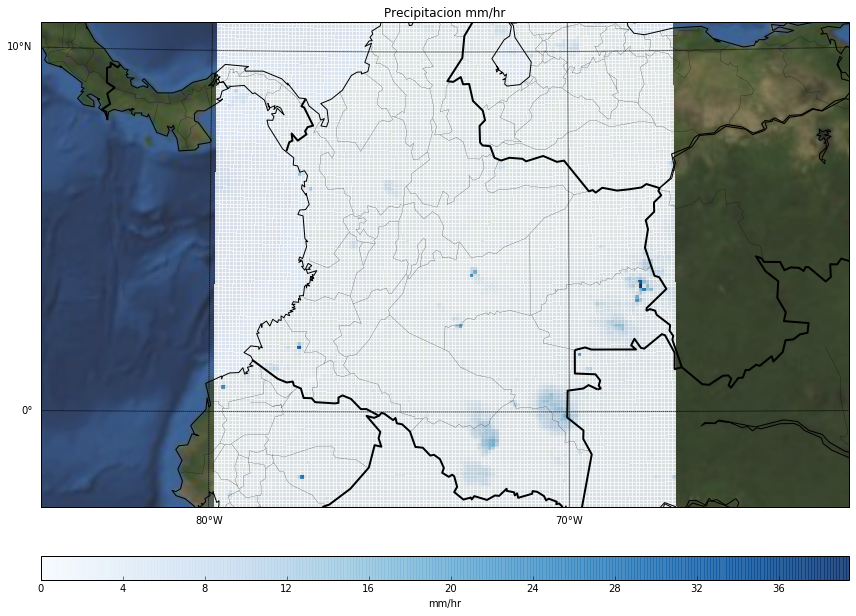

In [13]:
from ipywidgets import widgets  
def valor(x):
    return ploteo(x)
widgets.interact(valor, x=(0,len(archivos)-1,1))